In [1]:
from dateutil.parser import parse
from pathlib import Path

temperatures_path = Path.cwd()/'..'/'data'/'temperatures'
last_fetch_date = sorted(parse(fetch_date.stem) for fetch_date in temperatures_path.iterdir())[-1]
last_fetch_path = temperatures_path/last_fetch_date.isoformat()
last_fetch_path

PosixPath('/home/naheridi/DataspellProjects/temperature-analysis/notebooks/../data/temperatures/2021-04-12T13:38:31')

In [2]:
from pandas import read_csv

temperatures = read_csv(last_fetch_path/'2_normalized'/'dataset.csv', parse_dates=True, index_col=0)
temperatures

,wall_316,wall_210,bat_412_a,bat_316,bat_420,wall_412_a,bat_210,wall_420
2020-02-19 21:30:00,NaN,NaN,NaN,NaN,12.580000,NaN,NaN,NaN
2020-02-19 21:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-19 21:50:00,NaN,NaN,NaN,NaN,25.000000,NaN,NaN,NaN
2020-02-19 22:00:00,NaN,NaN,NaN,NaN,40.731481,NaN,NaN,NaN
2020-02-19 22:10:00,NaN,NaN,NaN,NaN,51.561000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-12-04 12:50:00,19.94,24.81,23.00,41.37,46.810000,21.44,40.00,22.56
2021-12-04 13:00:00,19.94,24.87,23.00,37.31,45.630000,21.50,40.69,22.56
2021-12-04 13:10:00,20.06,24.87,23.06,39.94,49.310000,21.56,39.88,22.62
2021-12-04 13:20:00,20.12,24.87,23.25,39.00,45.810000,21.75,40.44,22.62


<AxesSubplot:>

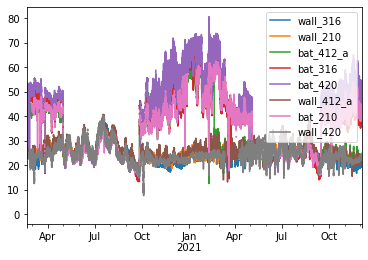

In [3]:
temperatures.plot()

<AxesSubplot:>

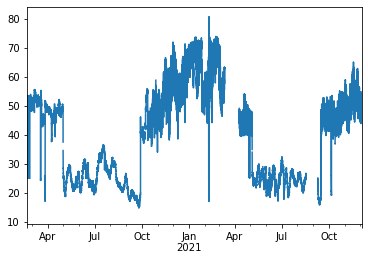

In [7]:
temperatures.bat_420.plot()
temperatures.wall_420.plot()

In [9]:
temperatures_changes = temperatures.pct_change()
temperatures_changes

,wall_316,wall_210,bat_412_a,bat_316,bat_420,wall_412_a,bat_210,wall_420
2020-02-19 21:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-19 21:40:00,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
2020-02-19 21:50:00,NaN,NaN,NaN,NaN,0.987281,NaN,NaN,NaN
2020-02-19 22:00:00,NaN,NaN,NaN,NaN,0.629259,NaN,NaN,NaN
2020-02-19 22:10:00,NaN,NaN,NaN,NaN,0.265876,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-12-04 12:50:00,0.000000,-0.002413,0.000000,0.099389,-0.036038,0.000000,-0.009411,0.005348
2021-12-04 13:00:00,0.000000,0.002418,0.000000,-0.098139,-0.025208,0.002799,0.017250,0.000000
2021-12-04 13:10:00,0.006018,0.000000,0.002609,0.070490,0.080649,0.002791,-0.019907,0.002660
2021-12-04 13:20:00,0.002991,0.000000,0.008239,-0.023535,-0.070980,0.008813,0.014042,0.000000


Выбросы синего ряда свидетельствуют о переключении отопления

<AxesSubplot:>

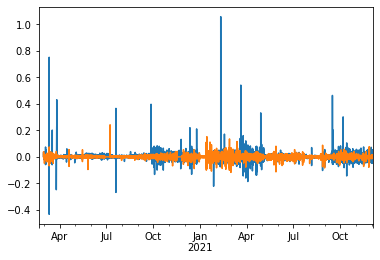

In [12]:
temperatures_changes.bat_210.plot()
temperatures_changes.wall_210.plot()

<AxesSubplot:>

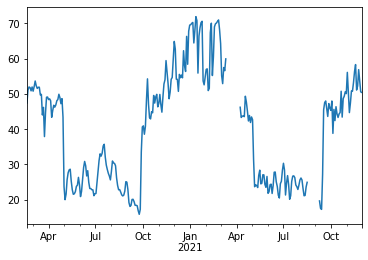

In [110]:
temperatures.bat_412_a.resample('2D').mean().plot()

<AxesSubplot:>

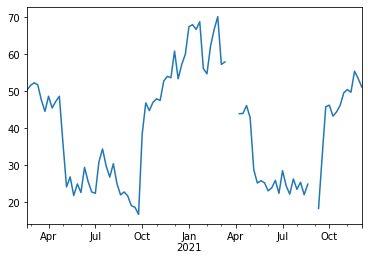

In [111]:
temperatures.bat_412_a.resample('W').mean().plot()

<AxesSubplot:>

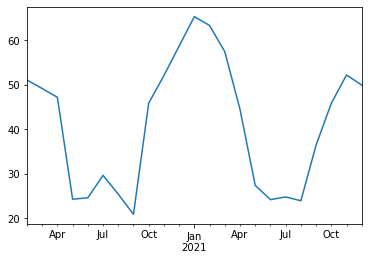

In [112]:
temperatures.bat_412_a.resample('M').mean().plot()

<AxesSubplot:>

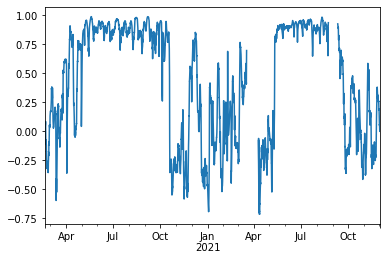

In [152]:
temperatures.bat_420.rolling(1000, min_periods=100).corr(temperatures.wall_420).plot()

<AxesSubplot:>

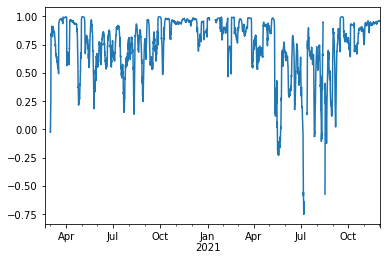

In [153]:
temperatures.bat_316.rolling(1000, min_periods=100).corr(temperatures.bat_210).plot()

Автокорреляционная функция по месяцам

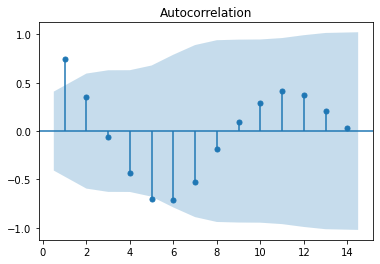

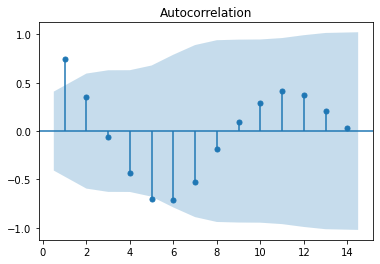

In [183]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(temperatures.bat_420.resample('M').mean(), missing='drop', zero=False)

Автокорреляционная функция по месяцам с использованием Быстрого Преобразования Фурье

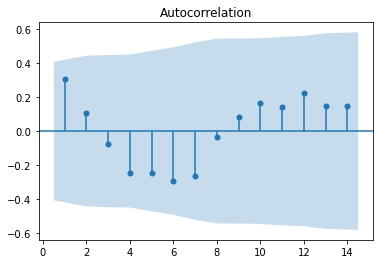

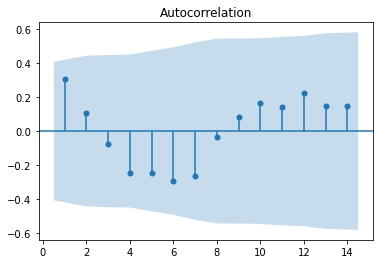

In [184]:
plot_acf(temperatures.bat_420.resample('M').mean(), missing='drop', fft=True, zero=False)

Автокорреляционная функция по месяцам с уменьшение дов. интервала

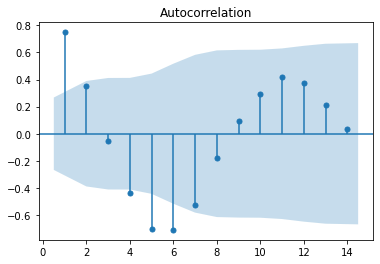

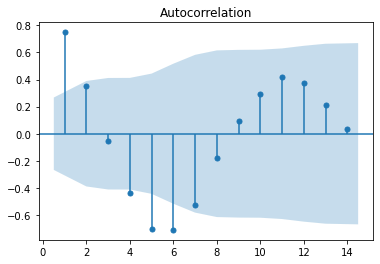

In [185]:
plot_acf(temperatures.bat_420.resample('M').mean(), missing='drop', alpha=0.2, zero=False)

Автокорреляционная функция по месяцам с корреткировкой для автоковариации

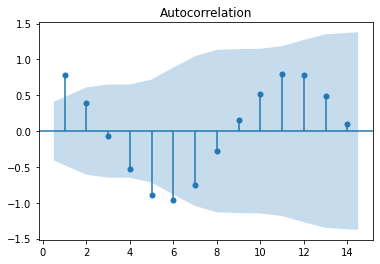

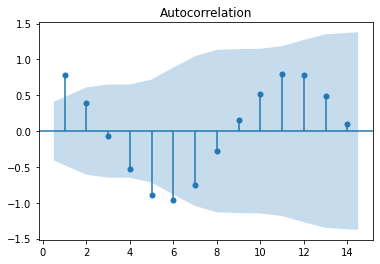

In [186]:
plot_acf(temperatures.bat_420.resample('M').mean(), missing='drop', adjusted=True, zero=False)